In [1]:
import pandas as pd
import scanpy as sc

In [3]:
adata=sc.read('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/human_intestinal_APA_exp_scale.h5ad')
adata

AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['organ_celltype']=adata.obs['organ'].astype('str')+'_'+adata.obs['celltype'].astype('str')
adata

AnnData object with n_obs × n_vars = 14537 × 14025
    obs: 'celltype', 'sample_id', 'organ', 'organ_celltype'
    var: 'cluster_start', 'cluster_end', 'cluster_score', 'cluster_strand', 'gene_start', 'gene_end', 'gene_score', 'gene_strand', 'original_cluster_id', 'cluster_chr', 'gene_chr', 'gene_id', 'gene_name'
    uns: 'log1p', 'neighbors', 'paga'
    obsm: 'X_pca', 'X_tsne'
    layers: 'raw_count'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs['organ_celltype']

ACTTACTCAGATGGCA-SRR8513794      Ileum_Enterocyte
CTCTACGGTTCCATGA-SRR8513794      Ileum_Enterocyte
AAGGCAGTCTACTTAC-SRR8513794      Ileum_Enterocyte
GGGACCTAGAAACGCC-SRR8513794      Ileum_Enterocyte
AGCGTATTCAGGCGAA-SRR8513794      Ileum_Enterocyte
                                      ...        
TCAGGATGTACCGCTG-SRR8513799    Rectum_Paneth-like
CGCTTCAGTCAAAGCG-SRR8513799     Rectum_Progenitor
AGAGCTTTCAGAGGTG-SRR8513799     Rectum_Progenitor
TCCACACAGCGATTCT-SRR8513799     Rectum_Progenitor
CATCCACAGGTCATCT-SRR8513799     Rectum_Progenitor
Name: organ_celltype, Length: 14537, dtype: object

In [6]:
clusterdict={}
for i in adata.obs['organ_celltype'].unique():
    cellcluster=adata[adata.obs['organ_celltype']==i,:]
    clusterarray=cellcluster.X.toarray().sum(axis=0)/(cellcluster.X.toarray().sum())
    
    clusterdict[i]=clusterarray

In [7]:
clusterdict

{'Ileum_Enterocyte': array([6.42078073e-06, 1.91242919e-05, 1.26167090e-04, ...,
        1.32252126e-04, 2.48484411e-05, 8.88881864e-05]),
 'Ileum_TA': array([1.00435773e-05, 1.78427464e-05, 1.58048170e-04, ...,
        1.10246675e-04, 2.22953508e-05, 1.88317984e-04]),
 'Ileum_Progenitor': array([5.60848958e-06, 1.94748030e-05, 1.73126704e-04, ...,
        1.43618462e-04, 3.03229584e-05, 1.49154670e-04]),
 'Ileum_Goblet': array([4.63269364e-06, 1.75883514e-05, 1.45577046e-04, ...,
        9.77946789e-05, 2.16158970e-05, 1.04392019e-04]),
 'Ileum_Paneth-like': array([3.39797028e-06, 3.50685486e-05, 1.22775222e-04, ...,
        1.32200118e-04, 4.57212676e-05, 1.01850193e-04]),
 'Ileum_Stem Cell': array([0.00000000e+00, 2.97350723e-05, 3.25801430e-04, ...,
        1.28650879e-04, 3.37391603e-05, 1.51915485e-04]),
 'Ileum_Enteriendocrine': array([5.97718649e-06, 3.92854496e-05, 2.48228684e-04, ...,
        6.55454055e-05, 1.02323305e-05, 1.06663062e-04]),
 'Colon_Goblet': array([1.82152036

In [8]:
organ_celltype=list(clusterdict.keys())
organ_celltype

['Ileum_Enterocyte',
 'Ileum_TA',
 'Ileum_Progenitor',
 'Ileum_Goblet',
 'Ileum_Paneth-like',
 'Ileum_Stem Cell',
 'Ileum_Enteriendocrine',
 'Colon_Goblet',
 'Colon_Enterocyte',
 'Colon_Paneth-like',
 'Colon_Progenitor',
 'Colon_Enteriendocrine',
 'Colon_TA',
 'Colon_Stem Cell',
 'Rectum_Goblet',
 'Rectum_Enterocyte',
 'Rectum_Progenitor',
 'Rectum_Paneth-like',
 'Rectum_Enteriendocrine',
 'Rectum_Stem Cell',
 'Rectum_TA']

In [9]:
from scipy.spatial import distance

JSDdict={}
for i in organ_celltype:
    for j in organ_celltype:
        print(i)
        print(j)
        comparenamels=i+'_VS_'+j
        jsdnum=distance.jensenshannon(clusterdict[i],clusterdict[j],base=2)
        JSDdict[comparenamels]=jsdnum

JSDdict

Ileum_Enterocyte
Ileum_Enterocyte
Ileum_Enterocyte
Ileum_TA
Ileum_Enterocyte
Ileum_Progenitor
Ileum_Enterocyte
Ileum_Goblet
Ileum_Enterocyte
Ileum_Paneth-like
Ileum_Enterocyte
Ileum_Stem Cell
Ileum_Enterocyte
Ileum_Enteriendocrine
Ileum_Enterocyte
Colon_Goblet
Ileum_Enterocyte
Colon_Enterocyte
Ileum_Enterocyte
Colon_Paneth-like
Ileum_Enterocyte
Colon_Progenitor
Ileum_Enterocyte
Colon_Enteriendocrine
Ileum_Enterocyte
Colon_TA
Ileum_Enterocyte
Colon_Stem Cell
Ileum_Enterocyte
Rectum_Goblet
Ileum_Enterocyte
Rectum_Enterocyte
Ileum_Enterocyte
Rectum_Progenitor
Ileum_Enterocyte
Rectum_Paneth-like
Ileum_Enterocyte
Rectum_Enteriendocrine
Ileum_Enterocyte
Rectum_Stem Cell
Ileum_Enterocyte
Rectum_TA
Ileum_TA
Ileum_Enterocyte
Ileum_TA
Ileum_TA
Ileum_TA
Ileum_Progenitor
Ileum_TA
Ileum_Goblet
Ileum_TA
Ileum_Paneth-like
Ileum_TA
Ileum_Stem Cell
Ileum_TA
Ileum_Enteriendocrine
Ileum_TA
Colon_Goblet
Ileum_TA
Colon_Enterocyte
Ileum_TA
Colon_Paneth-like
Ileum_TA
Colon_Progenitor
Ileum_TA
Colon_Enteriend

{'Ileum_Enterocyte_VS_Ileum_Enterocyte': 0.0,
 'Ileum_Enterocyte_VS_Ileum_TA': 0.3103874762346724,
 'Ileum_Enterocyte_VS_Ileum_Progenitor': 0.21021715774373698,
 'Ileum_Enterocyte_VS_Ileum_Goblet': 0.2592922444211005,
 'Ileum_Enterocyte_VS_Ileum_Paneth-like': 0.23389009249399711,
 'Ileum_Enterocyte_VS_Ileum_Stem Cell': 0.3060179057719387,
 'Ileum_Enterocyte_VS_Ileum_Enteriendocrine': 0.31417074113841525,
 'Ileum_Enterocyte_VS_Colon_Goblet': 0.317626969846714,
 'Ileum_Enterocyte_VS_Colon_Enterocyte': 0.2532392604070159,
 'Ileum_Enterocyte_VS_Colon_Paneth-like': 0.2832421896021391,
 'Ileum_Enterocyte_VS_Colon_Progenitor': 0.30469610217852655,
 'Ileum_Enterocyte_VS_Colon_Enteriendocrine': 0.381556680040868,
 'Ileum_Enterocyte_VS_Colon_TA': 0.3463485349328777,
 'Ileum_Enterocyte_VS_Colon_Stem Cell': 0.3519947921763879,
 'Ileum_Enterocyte_VS_Rectum_Goblet': 0.32079781768270094,
 'Ileum_Enterocyte_VS_Rectum_Enterocyte': 0.2862690743983728,
 'Ileum_Enterocyte_VS_Rectum_Progenitor': 0.31154818

In [10]:
JSDdf=pd.DataFrame.from_dict(JSDdict,orient='index')
JSDdf

,0
Ileum_Enterocyte_VS_Ileum_Enterocyte,0.000000
Ileum_Enterocyte_VS_Ileum_TA,0.310387
Ileum_Enterocyte_VS_Ileum_Progenitor,0.210217
Ileum_Enterocyte_VS_Ileum_Goblet,0.259292
Ileum_Enterocyte_VS_Ileum_Paneth-like,0.233890
...,...
Rectum_TA_VS_Rectum_Progenitor,0.151238
Rectum_TA_VS_Rectum_Paneth-like,0.216391
Rectum_TA_VS_Rectum_Enteriendocrine,0.235767
Rectum_TA_VS_Rectum_Stem Cell,0.138662


In [11]:
JSDdf.reset_index(inplace=True)
JSDdf

,index,0
0,Ileum_Enterocyte_VS_Ileum_Enterocyte,0.000000
1,Ileum_Enterocyte_VS_Ileum_TA,0.310387
2,Ileum_Enterocyte_VS_Ileum_Progenitor,0.210217
3,Ileum_Enterocyte_VS_Ileum_Goblet,0.259292
4,Ileum_Enterocyte_VS_Ileum_Paneth-like,0.233890
...,...,...
436,Rectum_TA_VS_Rectum_Progenitor,0.151238
437,Rectum_TA_VS_Rectum_Paneth-like,0.216391
438,Rectum_TA_VS_Rectum_Enteriendocrine,0.235767
439,Rectum_TA_VS_Rectum_Stem Cell,0.138662


In [12]:
JSDdf['first_axis']=JSDdf['index'].str.split('_VS_',expand=True)[0]
JSDdf['second_axis']=JSDdf['index'].str.split('_VS_',expand=True)[1]
JSDdf

,index,0,first_axis,second_axis
0,Ileum_Enterocyte_VS_Ileum_Enterocyte,0.000000,Ileum_Enterocyte,Ileum_Enterocyte
1,Ileum_Enterocyte_VS_Ileum_TA,0.310387,Ileum_Enterocyte,Ileum_TA
2,Ileum_Enterocyte_VS_Ileum_Progenitor,0.210217,Ileum_Enterocyte,Ileum_Progenitor
3,Ileum_Enterocyte_VS_Ileum_Goblet,0.259292,Ileum_Enterocyte,Ileum_Goblet
4,Ileum_Enterocyte_VS_Ileum_Paneth-like,0.233890,Ileum_Enterocyte,Ileum_Paneth-like
...,...,...,...,...
436,Rectum_TA_VS_Rectum_Progenitor,0.151238,Rectum_TA,Rectum_Progenitor
437,Rectum_TA_VS_Rectum_Paneth-like,0.216391,Rectum_TA,Rectum_Paneth-like
438,Rectum_TA_VS_Rectum_Enteriendocrine,0.235767,Rectum_TA,Rectum_Enteriendocrine
439,Rectum_TA_VS_Rectum_Stem Cell,0.138662,Rectum_TA,Rectum_Stem Cell


In [13]:
newJSDdf=JSDdf.pivot(index='first_axis',columns='second_axis',values=0)
newJSDdf

second_axis,Colon_Enteriendocrine,Colon_Enterocyte,Colon_Goblet,Colon_Paneth-like,Colon_Progenitor,Colon_Stem Cell,Colon_TA,Ileum_Enteriendocrine,Ileum_Enterocyte,Ileum_Goblet,...,Ileum_Progenitor,Ileum_Stem Cell,Ileum_TA,Rectum_Enteriendocrine,Rectum_Enterocyte,Rectum_Goblet,Rectum_Paneth-like,Rectum_Progenitor,Rectum_Stem Cell,Rectum_TA
first_axis,,,,,,,,,,,,,,,,,,,,,
Colon_Enteriendocrine,0.000000,0.322671,0.283614,0.289248,0.283191,0.291196,0.299369,0.304001,0.381557,0.307803,...,0.309072,0.300716,0.311227,0.274656,0.393462,0.291438,0.301348,0.304450,0.292567,0.308498
Colon_Enterocyte,0.322671,0.000000,0.218771,0.170334,0.183678,0.268986,0.247559,0.290348,0.253239,0.217468,...,0.203956,0.268266,0.254962,0.282366,0.180077,0.223729,0.185364,0.183788,0.260088,0.259060
Colon_Goblet,0.283614,0.218771,0.000000,0.194365,0.189601,0.227555,0.223224,0.282276,0.317627,0.174095,...,0.233527,0.245816,0.242408,0.248328,0.314977,0.113775,0.216008,0.206090,0.220621,0.231672
Colon_Paneth-like,0.289248,0.170334,0.194365,0.000000,0.161996,0.238354,0.213947,0.279000,0.283242,0.216199,...,0.204211,0.243800,0.236994,0.268022,0.264399,0.206977,0.120092,0.195688,0.232317,0.237320
Colon_Progenitor,0.283191,0.183678,0.189601,0.161996,0.000000,0.153936,0.120316,0.265320,0.304696,0.199960,...,0.162102,0.194800,0.170064,0.241927,0.294108,0.197524,0.181834,0.129949,0.157355,0.162675
Colon_Stem Cell,0.291196,0.268986,0.227555,0.238354,0.153936,0.000000,0.172256,0.276045,0.351995,0.228826,...,0.213796,0.161689,0.202169,0.241563,0.354316,0.220762,0.235589,0.192980,0.128861,0.185162
Colon_TA,0.299369,0.247559,0.223224,0.213947,0.120316,0.172256,0.000000,0.282586,0.346349,0.222518,...,0.203743,0.215170,0.133464,0.258521,0.341485,0.232903,0.229104,0.187846,0.177717,0.118761
Ileum_Enteriendocrine,0.304001,0.290348,0.282276,0.279000,0.265320,0.276045,0.282586,0.000000,0.314171,0.239127,...,0.244849,0.252146,0.264998,0.234708,0.343111,0.277731,0.277955,0.273905,0.271035,0.285140
Ileum_Enterocyte,0.381557,0.253239,0.317627,0.283242,0.304696,0.351995,0.346349,0.314171,0.000000,0.259292,...,0.210217,0.306018,0.310387,0.354280,0.286269,0.320798,0.288560,0.311548,0.346676,0.355563


In [14]:
labeldf=pd.DataFrame(newJSDdf.index)
labeldf

,first_axis
0,Colon_Enteriendocrine
1,Colon_Enterocyte
2,Colon_Goblet
3,Colon_Paneth-like
4,Colon_Progenitor
5,Colon_Stem Cell
6,Colon_TA
7,Ileum_Enteriendocrine
8,Ileum_Enterocyte
9,Ileum_Goblet


In [15]:
labeldf['organ']=labeldf['first_axis'].str.split('_',expand=True)[0]
labeldf['cell_type']=labeldf['first_axis'].str.split('_',expand=True)[1]
labeldf

,first_axis,organ,cell_type
0,Colon_Enteriendocrine,Colon,Enteriendocrine
1,Colon_Enterocyte,Colon,Enterocyte
2,Colon_Goblet,Colon,Goblet
3,Colon_Paneth-like,Colon,Paneth-like
4,Colon_Progenitor,Colon,Progenitor
5,Colon_Stem Cell,Colon,Stem Cell
6,Colon_TA,Colon,TA
7,Ileum_Enteriendocrine,Ileum,Enteriendocrine
8,Ileum_Enterocyte,Ileum,Enterocyte
9,Ileum_Goblet,Ileum,Goblet


In [16]:
import seaborn as sns
import colorcet as cc


In [17]:
lut = dict(zip(set(labeldf['cell_type']), sns.color_palette(cc.glasbey,len(set(labeldf['cell_type'])))))
lut

{'Paneth-like': (0.8392156862745098, 0.0, 0.0),
 'Goblet': (0.5490196078431373, 0.23137254901960785, 1.0),
 'Enteriendocrine': (0.00392156862745098, 0.5294117647058824, 0.0),
 'Progenitor': (0.0, 0.6745098039215687, 0.7764705882352941),
 'TA': (0.592156862745098, 1.0, 0.0),
 'Stem Cell': (1.0, 0.49411764705882355, 0.8196078431372549),
 'Enterocyte': (0.4196078431372549, 0.0, 0.30980392156862746)}

In [18]:
row_colors=labeldf['cell_type'].map(lut)

row_colors

0     (0.00392156862745098, 0.5294117647058824, 0.0)
1     (0.4196078431372549, 0.0, 0.30980392156862746)
2     (0.5490196078431373, 0.23137254901960785, 1.0)
3                     (0.8392156862745098, 0.0, 0.0)
4      (0.0, 0.6745098039215687, 0.7764705882352941)
5     (1.0, 0.49411764705882355, 0.8196078431372549)
6                      (0.592156862745098, 1.0, 0.0)
7     (0.00392156862745098, 0.5294117647058824, 0.0)
8     (0.4196078431372549, 0.0, 0.30980392156862746)
9     (0.5490196078431373, 0.23137254901960785, 1.0)
10                    (0.8392156862745098, 0.0, 0.0)
11     (0.0, 0.6745098039215687, 0.7764705882352941)
12    (1.0, 0.49411764705882355, 0.8196078431372549)
13                     (0.592156862745098, 1.0, 0.0)
14    (0.00392156862745098, 0.5294117647058824, 0.0)
15    (0.4196078431372549, 0.0, 0.30980392156862746)
16    (0.5490196078431373, 0.23137254901960785, 1.0)
17                    (0.8392156862745098, 0.0, 0.0)
18     (0.0, 0.6745098039215687, 0.77647058823

In [19]:
lut2 = dict(zip(set(labeldf['organ']), sns.color_palette(cc.glasbey,len(set(labeldf['organ'])))))
lut2

{'Rectum': (0.8392156862745098, 0.0, 0.0),
 'Colon': (0.5490196078431373, 0.23137254901960785, 1.0),
 'Ileum': (0.00392156862745098, 0.5294117647058824, 0.0)}

In [20]:
row_colors2=labeldf['organ'].map(lut2)

row_colors2

0     (0.5490196078431373, 0.23137254901960785, 1.0)
1     (0.5490196078431373, 0.23137254901960785, 1.0)
2     (0.5490196078431373, 0.23137254901960785, 1.0)
3     (0.5490196078431373, 0.23137254901960785, 1.0)
4     (0.5490196078431373, 0.23137254901960785, 1.0)
5     (0.5490196078431373, 0.23137254901960785, 1.0)
6     (0.5490196078431373, 0.23137254901960785, 1.0)
7     (0.00392156862745098, 0.5294117647058824, 0.0)
8     (0.00392156862745098, 0.5294117647058824, 0.0)
9     (0.00392156862745098, 0.5294117647058824, 0.0)
10    (0.00392156862745098, 0.5294117647058824, 0.0)
11    (0.00392156862745098, 0.5294117647058824, 0.0)
12    (0.00392156862745098, 0.5294117647058824, 0.0)
13    (0.00392156862745098, 0.5294117647058824, 0.0)
14                    (0.8392156862745098, 0.0, 0.0)
15                    (0.8392156862745098, 0.0, 0.0)
16                    (0.8392156862745098, 0.0, 0.0)
17                    (0.8392156862745098, 0.0, 0.0)
18                    (0.8392156862745098, 0.0

In [21]:
from matplotlib.pyplot import gcf
import matplotlib.pyplot as plt

/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/seaborn-0.13.1-py3.9.egg/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/mnt/ruiyanhou/nfs_share2/conda_env/envs/Py39/lib/python3.9/site-packages/seaborn-0.13.1-py3.9.egg/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


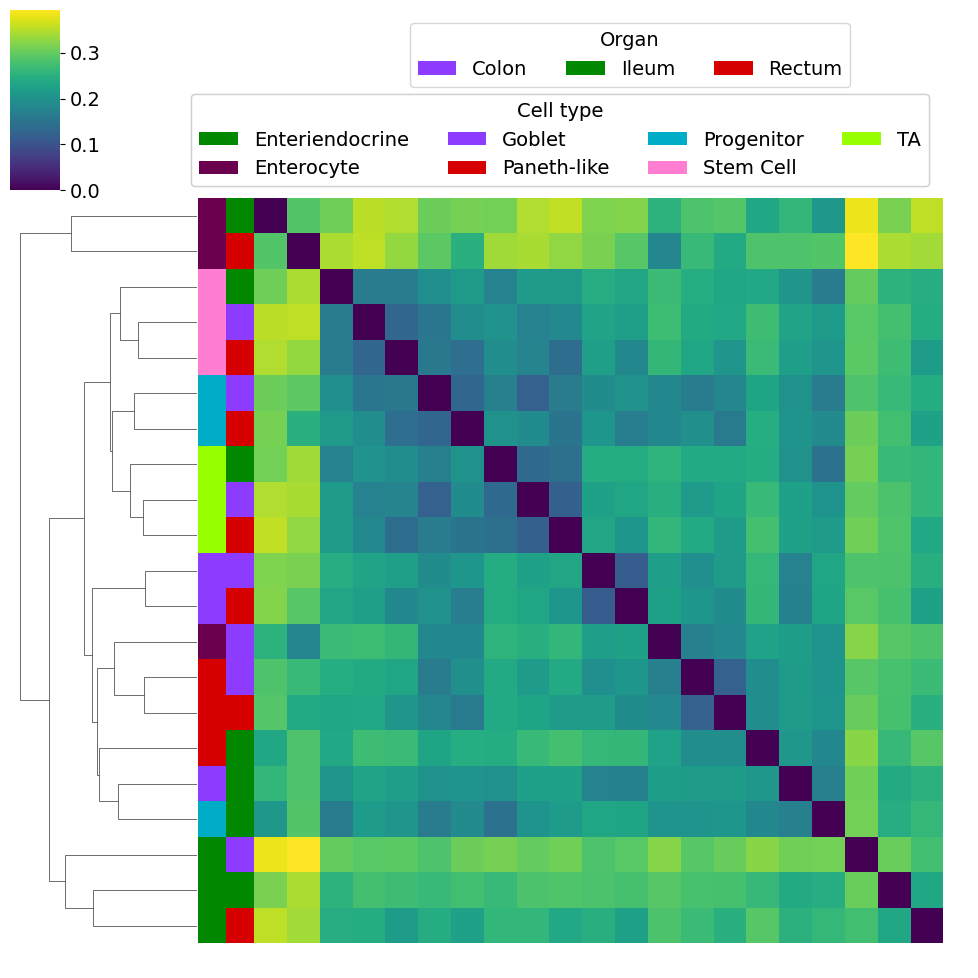

In [22]:
plt.rcParams['font.size']=14

fig=sns.clustermap(newJSDdf,yticklabels=False,row_colors=[row_colors, row_colors2],xticklabels=False,cmap='viridis')
fig.ax_col_dendrogram.set_visible(False)
fig.ax_heatmap.set_xlabel(" ")
fig.ax_heatmap.set_ylabel(" ")
for label in labeldf['organ'].unique():
    fig.ax_row_dendrogram.bar(0, 0, color=lut2[label],label=label, linewidth=0)
l1=fig.ax_row_dendrogram.legend(title='Organ', loc="center", ncol=5, bbox_to_anchor=(0.64, 0.935), bbox_transform=gcf().transFigure) 


xx = []

for label in labeldf['cell_type'].unique():
    l2=fig.ax_row_dendrogram.bar(0, 0, color=lut[label],label=label, linewidth=0)
    xx.append(l2)
legend2 = plt.legend(xx,labeldf['cell_type'].unique(), ncol=4,loc="center", title='Cell type', bbox_to_anchor=(.57, 0.85), bbox_transform=gcf().transFigure)

    
    #l2=fig.ax_row_dendrogram.legend(title='cell type', loc="center", ncol=2, bbox_to_anchor=(0.8, 0.8), bbox_transform=gcf().transFigure) 

plt.gca().add_artist(legend2)
#fig.savefig('/mnt/ruiyanhou/nfs_share2/three_primer/human_intestinal/figure/JDS_PAS_heatmap.pdf',dpi=300,bbox_inches='tight')
plt.show()